In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.model_selection import train_test_split

In [79]:
x = 6 * np.random.rand(200, 1) - 3
y = 0.8 * x**2 + 0.9 * x + 2 + np.random.randn(200, 1)

Text(0, 0.5, 'y')

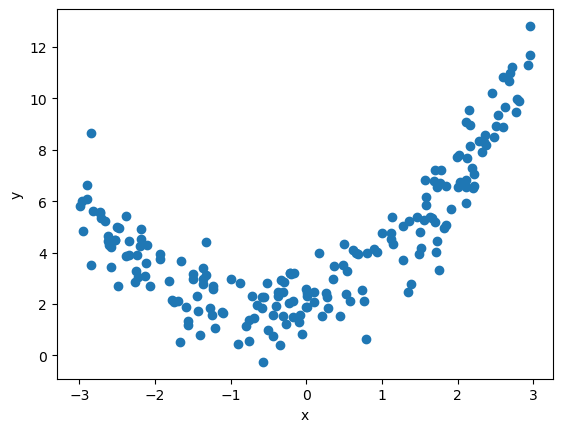

In [80]:
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

In [81]:
# Train test split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [82]:
from sklearn.metrics import r2_score
lr=LinearRegression()
lr.fit(X_train,y_train)
lr.predict(X_test)
r2_score(y_test,lr.predict(X_test))

0.4244258854452623

Text(0, 0.5, 'y')

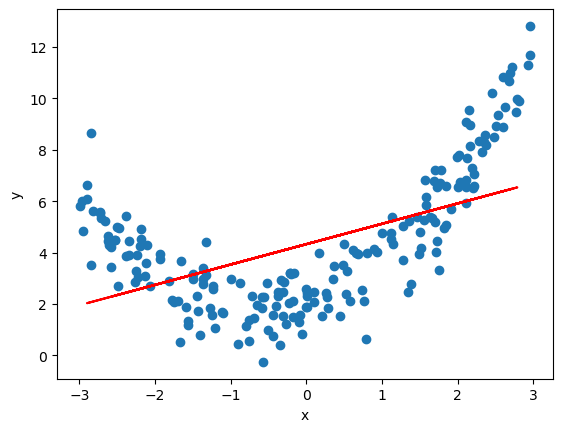

In [83]:
plt.plot(X_test,lr.predict(X_test),color='red')
plt.scatter(x,y)
plt.xlabel('x')
plt.ylabel('y')

### Polynomial regression

In [84]:

pr= PolynomialFeatures(degree=2,include_bias=False)
X_train_pr=pr.fit_transform(X_train)
X_test_pr=pr.fit_transform(X_test)

In [85]:
lr=LinearRegression()
lr.fit(X_train_pr,y_train)
lr.predict(X_test_pr)
r2_score(y_test,lr.predict(X_test_pr))

0.911507484179471

In [86]:
print(lr.coef_)
print(lr.intercept_)

[[0.89493624 0.74685529]]
[2.08382585]


In [87]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = pr.transform(X_new)
y_new = lr.predict(X_new_poly)

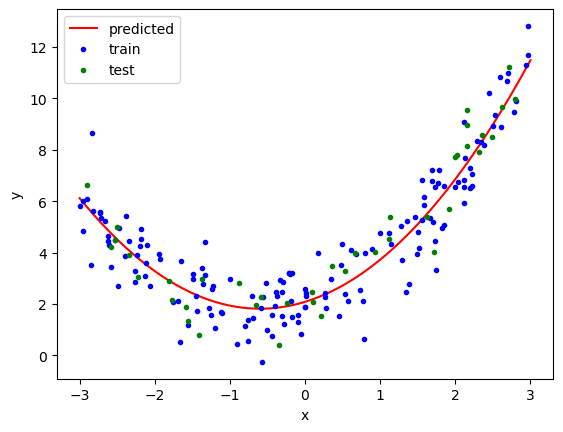

In [88]:
plt.plot(X_new,y_new,"r-",label='predicted')
plt.plot(X_train,y_train,"b.",label='train')
plt.plot(X_test,y_test,"g.",label='test')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [89]:
def polyregression(degree):
    xn= np.linspace(-3, 3, 200).reshape(200, 1)
    yn=pr.transform(xn)

    prr= Pipeline([
        ('scaler',StandardScaler()),
        ('poly',PolynomialFeatures(degree=degree,include_bias=False)),
        ('lin_reg',LinearRegression())
    ])
    prr.fit(X_train,y_train)
    y_pred=prr.predict(xn)
    plt.plot(xn,y_pred,'r-',label='Degree '+str(degree))
    plt.plot(X_train,y_train,'b.',label='train')
    plt.plot(X_test,y_test,'g.',label='test')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.axis([-3,3,0,10])
    plt.show()

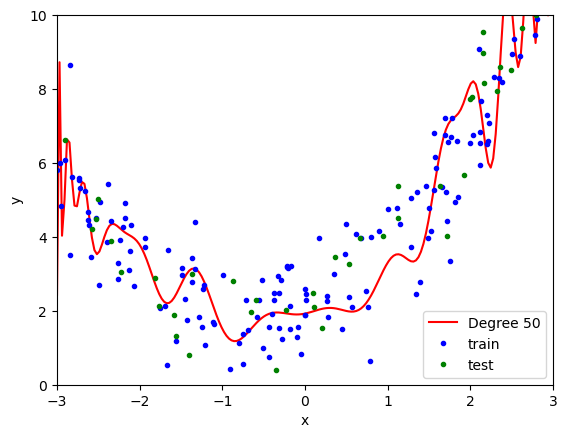

In [90]:
polyregression(50)

### Multiple polynomial regression

In [113]:
x= 9*np.random.rand(100,1)-3
y= 9*np.random.rand(100,1)-3

z=  x**2 + y**2 + 0.1*x*y + .2*x + .2*y + 2 + np.random.randn(100,1)

In [114]:
import plotly.express as px
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel(),color=z.ravel())
fig.show()

In [117]:
x_multi= np.array([x,y]).reshape(100,2)
x_multi.shape

(100, 2)

In [154]:
pr= PolynomialFeatures(degree=6)
x_multi_pr=pr.fit_transform(x_multi)

In [156]:

print(pr.n_output_features_)
print(pr.powers_)

28
[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]
 [3 0]
 [2 1]
 [1 2]
 [0 3]
 [4 0]
 [3 1]
 [2 2]
 [1 3]
 [0 4]
 [5 0]
 [4 1]
 [3 2]
 [2 3]
 [1 4]
 [0 5]
 [6 0]
 [5 1]
 [4 2]
 [3 3]
 [2 4]
 [1 5]
 [0 6]]


In [157]:
pr.n_features_in_

2

In [158]:
lr=LinearRegression()
lr.fit(x_multi_pr,z)


LinearRegression()

In [159]:
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

In [160]:
final_multi= pr.transform(final)

In [161]:
z_pred=lr.predict(final_multi).reshape(10,10)

In [162]:
import plotly.graph_objects as go
fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_pred))

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()